In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\DELL\Downloads\Respiratory_Virus_Hospital_Admissions_Over_Time (2).csv")
print(df.head())

  week_start_date week_end_date  epi_week respiratory_virus  new_admissions  \
0      15-12-2024    21-12-2024        51               RSV              23   
1      03-11-2024    09-11-2024        45          COVID-19              17   
2      09-11-2025    15-11-2025        46         Influenza               4   
3      21-09-2025    27-09-2025        39               RSV               0   
4      31-08-2025    06-09-2025        36               RSV               1   

   admission_rate_per_100k  sf_population_estimate   data_updated_at  \
0                     2.75                  836321  28-11-2025 08:05   
1                     2.03                  836321  28-11-2025 08:05   
2                     0.48                  836321  28-11-2025 08:05   
3                     0.00                  836321  28-11-2025 08:05   
4                     0.12                  836321  28-11-2025 08:05   

         data_as_of    data_loaded_at  
0  27-11-2025 11:25  28-11-2025 09:46  
1  27-11-202

In [3]:
print(df.groupby('respiratory_virus')['new_admissions'].describe()) 

print("\nInsights:\nCOVID-19 has a moderate spread with most values between ~12–23, but some higher outliers up to 66.\nInfluenza is highly skewed: most observations are low (median 3), but a few extreme values reach 119.\nRSV is generally low, with small median and 25th percentile, but can go up to 36.")


                   count       mean        std  min    25%   50%    75%    max
respiratory_virus                                                             
COVID-19            58.0  18.741379  12.775470  0.0  10.25  16.0  22.75   66.0
Influenza           58.0  18.120690  32.287675  0.0   1.00   3.0  13.75  119.0
RSV                 58.0   7.155172  10.675109  0.0   0.00   1.0   8.00   36.0

Insights:
COVID-19 has a moderate spread with most values between ~12–23, but some higher outliers up to 66.
Influenza is highly skewed: most observations are low (median 3), but a few extreme values reach 119.
RSV is generally low, with small median and 25th percentile, but can go up to 36.


In [4]:
avg_newadmin = df.groupby('respiratory_virus')['new_admissions'].mean()
print("Average PM2.5 by Sensor Index:\n", avg_newadmin)

print("\nInsights:\nCOVID-19 and Influenza admissions tend to occur in areas with \nhigher PM2.5 (air pollution), while RSV is associated with lower PM2.5 levels.\nThis doesn’t necessarily mean PM2.5 causes these diseases—it just shows a correlation in the dataset.")


Average PM2.5 by Sensor Index:
 respiratory_virus
COVID-19     18.741379
Influenza    18.120690
RSV           7.155172
Name: new_admissions, dtype: float64

Insights:
COVID-19 and Influenza admissions tend to occur in areas with 
higher PM2.5 (air pollution), while RSV is associated with lower PM2.5 levels.
This doesn’t necessarily mean PM2.5 causes these diseases—it just shows a correlation in the dataset.


In [5]:
print("Interpretation:")

if avg_newadmin['Influenza'] > avg_newadmin['RSV']:
    print("Influenza has a higher average number of new hospital admissions compared to RSV.")
elif avg_newadmin['Influenza'] < avg_newadmin['RSV']:
    print("RSV has a higher average number of new hospital admissions compared to Influenza.")
    
else:
    print("Both Influenza and RSV have the same average number of new hospital admissions.")

Interpretation:
Influenza has a higher average number of new hospital admissions compared to RSV.


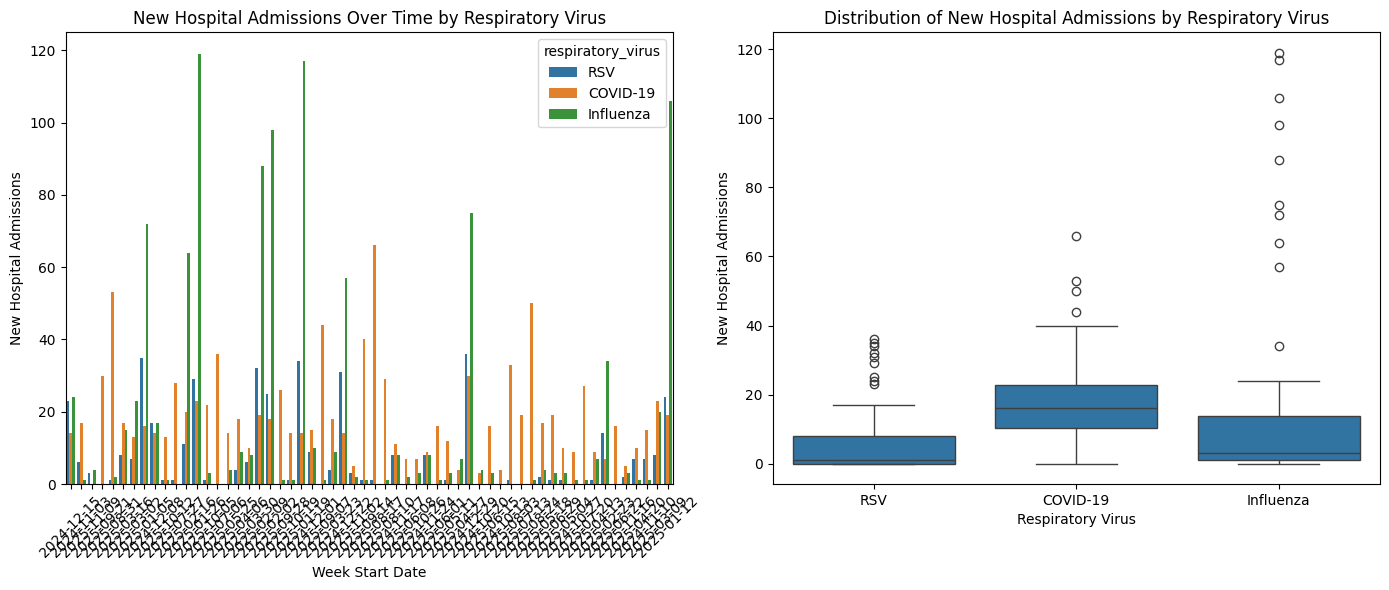

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['week_start_date'] = pd.to_datetime(df['week_start_date'], dayfirst=True, errors='coerce')

sns.barplot(data=df, x='week_start_date', y='new_admissions', hue='respiratory_virus', ax=axes[0])
axes[0].set_title('New Hospital Admissions Over Time by Respiratory Virus')
axes[0].set_xlabel('Week Start Date')
axes[0].set_ylabel('New Hospital Admissions')
for label in axes[0].get_xticklabels():
	label.set_rotation(45)
sns.boxplot(data=df, x='respiratory_virus', y='new_admissions', ax=axes[1])
axes[1].set_title('Distribution of New Hospital Admissions by Respiratory Virus')
axes[1].set_xlabel('Respiratory Virus')
axes[1].set_ylabel('New Hospital Admissions')

plt.tight_layout()
plt.show()

In [7]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [8]:
# ensure SciPy is installed in this notebook environment, then import at top of the cell
%pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from scipy import stats

Influenza_number = df[df['respiratory_virus'] == 'Influenza']['new_admissions']
RSV_number = df[df['respiratory_virus'] == 'RSV']['new_admissions']
t_stat, p_value = stats.ttest_ind(Influenza_number, RSV_number, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in new hospital admissions between Influenza and RSV.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in new hospital admissions between Influenza and RSV.")


T-statistic: 2.4557227343568595, P-value: 0.016570976825812385
Reject the null hypothesis: There is a significant difference in new hospital admissions between Influenza and RSV.


In [10]:
Influenza=df[df['respiratory_virus']=='Influenza']['new_admissions']
RSV=df[df['respiratory_virus']=='RSV']['new_admissions']
COVID_19=df[df['respiratory_virus']=='COVID-19']['new_admissions']


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mean_influenza=Influenza.mean()
mean_rsv=RSV.mean()
mean_covid_19=COVID_19.mean()
std_influenza=Influenza.std(ddof=1)
std_rsv=RSV.std(ddof=1)
std_covid_19=COVID_19.std(ddof=1)
n_influenza=len(Influenza)
n_rsv=len(RSV)
n_covid_19=len(COVID_19)

print("Respiratory Virus Statistics:")
print("-"*30)
print("Mean of Paitents across Viruses:")
print("Mean Influenza:", mean_influenza)
print("Mean RSV:",mean_rsv)
print("Mean Covid-19:",mean_covid_19)
print("-"*30)
print("Standard Deviation of Paitents across Viruses:")

print("Standard Deviation Influenza:",std_influenza)
print("Standard Deviation RSV:",std_rsv)
print("Standard Deviation Covid-19:",std_covid_19)
print("-"*30)
print("Number of Patients across Viruses:")

print("Number of Influenza Paitents:",n_influenza)
print("Number of RSV Paitents",n_rsv)
print("Number of Covid-19 Paitents:",n_covid_19)


Respiratory Virus Statistics:
------------------------------
Mean of Paitents across Viruses:
Mean Influenza: 18.120689655172413
Mean RSV: 7.155172413793103
Mean Covid-19: 18.74137931034483
------------------------------
Standard Deviation of Paitents across Viruses:
Standard Deviation Influenza: 32.28767489915036
Standard Deviation RSV: 10.675109143840633
Standard Deviation Covid-19: 12.775470389702326
------------------------------
Number of Patients across Viruses:
Number of Influenza Paitents: 58
Number of RSV Paitents 58
Number of Covid-19 Paitents: 58


In [12]:
Mean_of_Population=df['new_admissions'].mean()
Std_of_Population=df['new_admissions'].std(ddof=1)

z_stats=(Mean_of_Population-Std_of_Population)/(Std_of_Population/np.sqrt(len(df)))

p_value=2*(1-stats.norm.cdf(abs(z_stats)))

print(f"Z-Statistics:{z_stats}\nP-value:{p_value:4f}")

print("Since the p-value is so low, you reject the null hypothesis.This means the difference you observed (whatever your test compared) is statistically significant, and it is very unlikely to be due to random chance.")


Z-Statistics:-4.198994746226796
P-value:0.000027
Since the p-value is so low, you reject the null hypothesis.This means the difference you observed (whatever your test compared) is statistically significant, and it is very unlikely to be due to random chance.


In [13]:
t_stat_Influenza_RSV, p_value_Influenza_RSV = stats.ttest_ind(Influenza, RSV, equal_var=False)
print(f"Influenza vs RSV -> T-statistic: {t_stat_Influenza_RSV:.4f}, P-value: {p_value_Influenza_RSV:.4f}")

t_stat_Influenza_COVID, p_value_Influenza_COVID = stats.ttest_ind(Influenza, COVID_19, equal_var=False)
print(f"Influenza vs COVID-19 -> T-statistic: {t_stat_Influenza_COVID:.4f}, P-value: {p_value_Influenza_COVID:.4f}")

t_stat_RSV_COVID, p_value_RSV_COVID = stats.ttest_ind(RSV, COVID_19, equal_var=False)
print(f"RSV vs COVID-19 -> T-statistic: {t_stat_RSV_COVID:.4f}, P-value: {p_value_RSV_COVID:.4f}")

Influenza vs RSV -> T-statistic: 2.4557, P-value: 0.0166
Influenza vs COVID-19 -> T-statistic: -0.1361, P-value: 0.8921
RSV vs COVID-19 -> T-statistic: -5.3001, P-value: 0.0000


In [14]:
var_influenza=Influenza.var(ddof=1)
var_rsv=RSV.var(ddof=1)
var_covid_19=COVID_19.var(ddof=1)

F1=var_influenza/var_rsv
F2=var_influenza/var_covid_19
F3=var_rsv/var_covid_19

df_influenza=n_influenza-1
df_rsv=n_rsv-1
df_covid_19=n_covid_19-1

p_value_F1=2*(1-stats.f.cdf(F1,df_influenza,df_rsv))
p_value_F2=2*(1-stats.f.cdf(F2,df_influenza,df_covid_19))
p_value_F3=2*(1-stats.f.cdf(F3,df_rsv,df_covid_19))

print(f"F-Statsics Influenza vs RSV:{F1}\nP-value:{p_value_F1:4f}")
print(f"F-Statsics Influenza vs COVID-19:{F2}\nP-value:{p_value_F2:4f}")
print(f"F-Statsics RSV vs COVID-19:{F3}\nP-value:{p_value_F3:4f}")

F-Statsics Influenza vs RSV:9.1480577048136
P-value:0.000000
F-Statsics Influenza vs COVID-19:6.3873357290193695
P-value:0.000000
F-Statsics RSV vs COVID-19:0.6982176911344173
P-value:1.821865


In [20]:
Q1=df['new_admissions'].quantile(0.25)
Q3=df['new_admissions'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3-1.5*IQR

outliers=df[(df['new_admissions']<lower_limit)|(df['new_admissions']>upper_limit)]

df['new_admissions'].describe()

count    174.000000
mean      14.672414
std       21.524059
min        0.000000
25%        1.000000
50%        7.500000
75%       18.000000
max      119.000000
Name: new_admissions, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

x=df[['admission_rate_per_100k']]
y=df[['new_admissions']]

X_train, X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [32]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
pred=model.predict(X_test)
print(pred[:5])

[[-5.87247049e-03]
 [ 7.02005110e+00]
 [ 1.00311612e+01]
 [ 4.00894100e+00]
 [ 2.50030698e+01]]


In [38]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(X_test,pred)

print("MSE:",mse)

MSE: 395.5161107507631
